In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df2=pd.read_csv(r"D:\Road to Data Science\DataSets Given In Class\monthly-milk-production-pounds.csv")
df2.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df2.columns=["ds","y"]
df2

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [5]:
df2.drop(168,axis=0,inplace=True)
df2

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      168 non-null    object 
 1   y       168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [7]:
df2["ds"]=pd.to_datetime(df2["ds"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      168 non-null    datetime64[ns]
 1   y       168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


<AxesSubplot:xlabel='ds'>

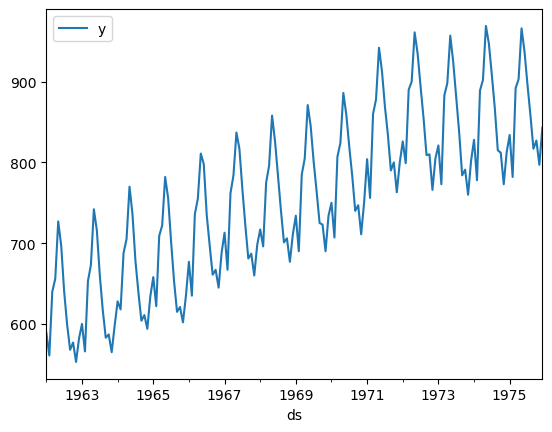

In [8]:
df2.plot(x="ds",y="y")

In [11]:
from prophet import Prophet

In [12]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [13]:
# intialize model

In [14]:
model=Prophet()

In [15]:
model.fit(df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\souvi\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [16]:
model

In [18]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [19]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [27]:
future_dates=model.make_future_dataframe(periods=365)

In [28]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [29]:
prediction=model.predict(future_dates)

C:\Users\souvi\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\souvi\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [30]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.849794,576.609675,596.467749,606.849794,606.849794,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,0.0,0.0,0.0,586.745106
1,1962-02-01,608.569237,536.300706,555.797267,608.569237,608.569237,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,0.0,0.0,0.0,546.026015
2,1962-03-01,610.122282,632.060060,651.827222,610.122282,610.122282,31.413370,31.413370,31.413370,31.413370,31.413370,31.413370,0.0,0.0,0.0,641.535653
3,1962-04-01,611.841725,648.704074,668.534019,611.841725,611.841725,46.743537,46.743537,46.743537,46.743537,46.743537,46.743537,0.0,0.0,0.0,658.585263
4,1962-05-01,613.505703,711.088541,731.439684,613.505703,613.505703,108.056343,108.056343,108.056343,108.056343,108.056343,108.056343,0.0,0.0,0.0,721.562045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1976-11-26,875.143414,803.293626,827.211531,870.378812,880.111166,-59.972681,-59.972681,-59.972681,-59.972681,-59.972681,-59.972681,0.0,0.0,0.0,815.170733
529,1976-11-27,875.161832,806.809978,830.236661,870.373976,880.147706,-56.771512,-56.771512,-56.771512,-56.771512,-56.771512,-56.771512,0.0,0.0,0.0,818.390320
530,1976-11-28,875.180250,809.837461,833.344450,870.369139,880.184246,-53.400510,-53.400510,-53.400510,-53.400510,-53.400510,-53.400510,0.0,0.0,0.0,821.779740
531,1976-11-29,875.198668,813.613319,837.164741,870.357910,880.220785,-49.922769,-49.922769,-49.922769,-49.922769,-49.922769,-49.922769,0.0,0.0,0.0,825.275899


In [31]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.170733,803.293626,827.211531
529,1976-11-27,818.390320,806.809978,830.236661
530,1976-11-28,821.779740,809.837461,833.344450
531,1976-11-29,825.275899,813.613319,837.164741
532,1976-11-30,828.808844,817.247016,839.891651


In [32]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.745106,576.609675,596.467749
1,1962-02-01,546.026015,536.300706,555.797267
2,1962-03-01,641.535653,632.060060,651.827222
3,1962-04-01,658.585263,648.704074,668.534019
4,1962-05-01,721.562045,711.088541,731.439684


# Plotting the Forecasts
# Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

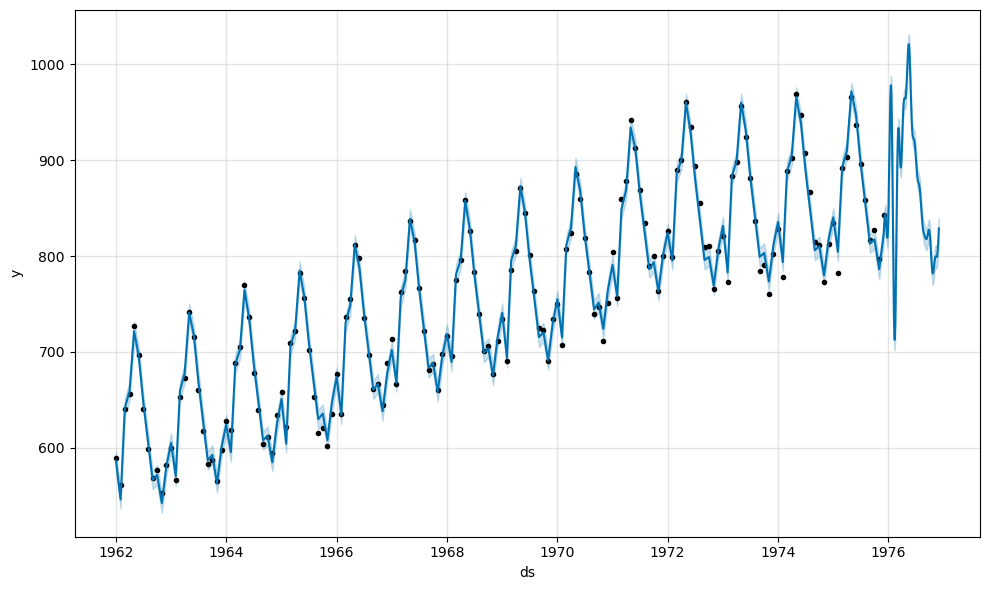

In [34]:
model.plot(prediction);

C:\Users\souvi\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


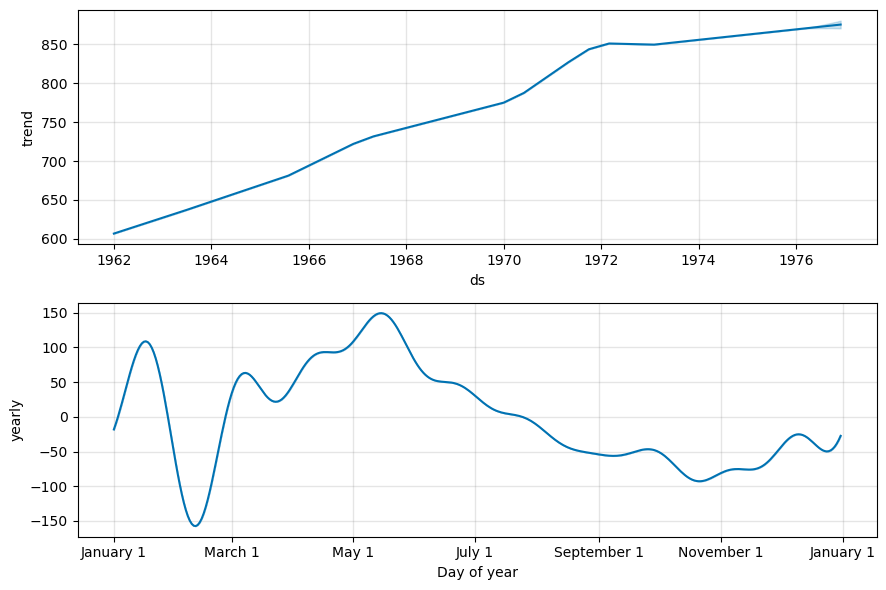

In [36]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction);

# Cross Validation
# Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

# horizon the forecast horizon
# initial the size of the initial training period
# period the spacing between cutoff dates


In [38]:
from prophet.diagnostics import cross_validation

In [39]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:prophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

C:\Users\souvi\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\souvi\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\souvi\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\souvi\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\souvi\a

In [40]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,619.087141,617.200770,621.159135,622.0,1965-01-22
1,1965-03-01,697.071986,690.874592,703.681448,709.0,1965-01-22
2,1965-04-01,709.290761,697.262846,723.293848,722.0,1965-01-22
3,1965-05-01,774.436723,754.800780,796.858681,782.0,1965-01-22
4,1965-06-01,742.879282,714.498006,773.937804,756.0,1965-01-22


In [41]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
247,1975-08-01,850.582813,840.340323,860.350796,858.0,1974-12-01
248,1975-09-01,808.189317,797.735904,817.944111,817.0,1974-12-01
249,1975-10-01,811.611644,802.284850,822.180605,827.0,1974-12-01
250,1975-11-01,779.609808,769.591276,789.447010,797.0,1974-12-01
251,1975-12-01,814.158114,802.498693,824.886185,843.0,1974-12-01


# Obtaining the Performance Metrics
# We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [44]:
from prophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,257.644337,16.051303,12.572310,0.016147,0.014236,0.016141,0.28
1,41 days,255.691801,15.990366,12.493472,0.016083,0.014236,0.016075,0.28
2,42 days,271.279611,16.470568,12.972159,0.016746,0.014528,0.016747,0.28
3,43 days,273.143144,16.527043,13.204699,0.017115,0.014528,0.017120,0.28
4,46 days,259.725549,16.116003,12.958665,0.016791,0.014528,0.016779,0.28


In [45]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,257.644337,16.051303,12.572310,0.016147,0.014236,0.016141,0.28
1,41 days,255.691801,15.990366,12.493472,0.016083,0.014236,0.016075,0.28
2,42 days,271.279611,16.470568,12.972159,0.016746,0.014528,0.016747,0.28
3,43 days,273.143144,16.527043,13.204699,0.017115,0.014528,0.017120,0.28
4,46 days,259.725549,16.116003,12.958665,0.016791,0.014528,0.016779,0.28
...,...,...,...,...,...,...,...,...
180,357 days,881.141224,29.684023,22.511721,0.028321,0.021820,0.027952,0.36
181,360 days,687.891427,26.227684,19.452020,0.024156,0.017203,0.023956,0.40
182,361 days,675.174515,25.984120,19.054909,0.023753,0.014183,0.023567,0.40
183,362 days,658.322393,25.657794,18.347110,0.022942,0.013880,0.022768,0.44


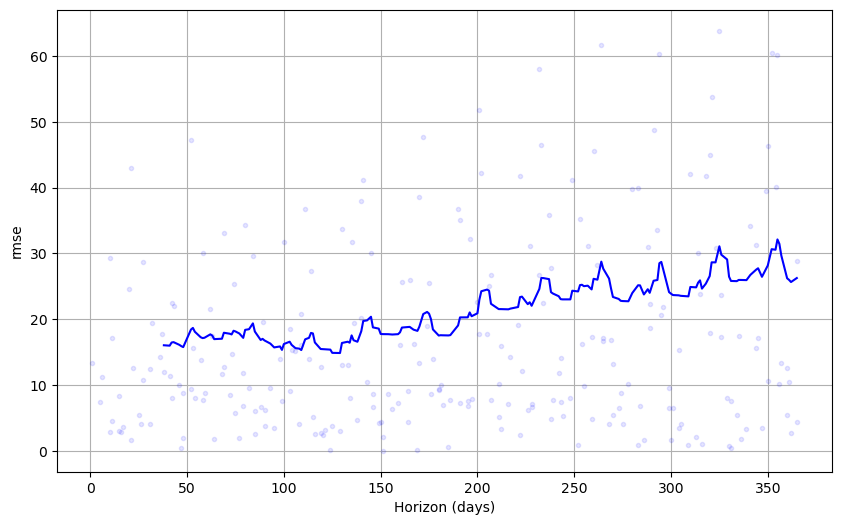

In [46]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')